In [22]:
import pandas as pd
from pathlib import Path
import os
import random 
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [23]:
path = Path('data')

In [24]:
metadata = pd.read_csv(path / 'answer.csv', header=None, names=['image', 'label'])
metadata

,image,label
0,train_0.tif,0
1,train_1.tif,0
2,train_2.tif,0
3,train_3.tif,1
4,train_4.tif,0
...,...,...
1237,train_1237.tif,0
1238,train_1238.tif,0
1239,train_1239.tif,1
1240,train_1240.tif,0


In [25]:
train_images = os.listdir(path / 'train')
len(train_images)

1243

In [26]:
for image in metadata.image.values:
	assert image in train_images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


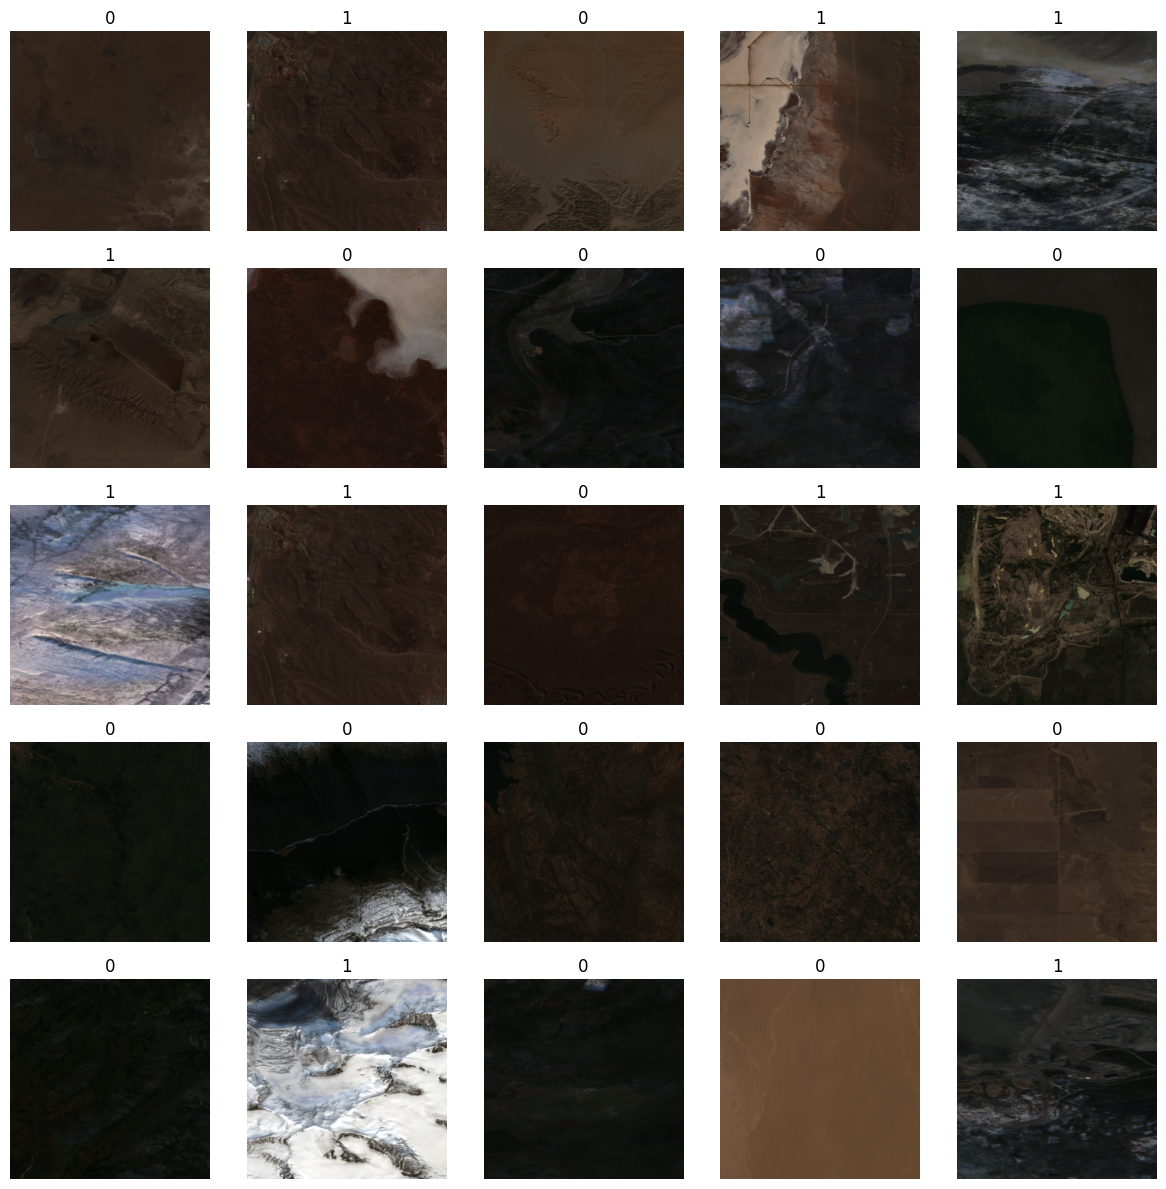

In [34]:
rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols, figsize=(12, 12))
for row in range(rows):
	for col in range(cols):
		image = random.choice(metadata.image.values)
		img = io.imread(path / 'train' / image)
		axs[row, col].imshow(img[...,(3,2,1)])
		axs[row, col].set_title(metadata[metadata.image == image].label.values[0])
		axs[row, col].axis('off')
plt.tight_layout()
plt.show()

In [33]:
img.dtype, img.shape, img.max(), img.min()

(dtype('float32'), (512, 512, 12), 0.5499, 0.01435)

Images are 512x512 and already normalized.

In [35]:
metadata.label.value_counts()

0    986
1    256
Name: label, dtype: int64

Dataset is not balanced.